In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.shape

(100000, 12)

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [6]:
# Сколько пустых ячеек в каждой колонке
df.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

In [7]:
# Подсчитаем сколько рядов с хотя бы одним пропущеным значением
# В колонке Cabin более 60 процентов пропущенных значений
count_missed = df.shape[0] - df.dropna().shape[0]
count_missed

69119

In [8]:
# Подсчитаем количество уникальных значений для каждой колонки
df.nunique()

PassengerId    100000
Survived            2
Pclass              3
Name            92144
Sex                 2
Age               173
SibSp               7
Parch               8
Ticket          75331
Fare            15935
Cabin           26992
Embarked            3
dtype: int64

In [9]:
df.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

In [10]:
df.Survived = df.Survived.astype(bool)

# Context

# Data quality assessment

# Data exploration

<AxesSubplot:xlabel='Survived', ylabel='count'>

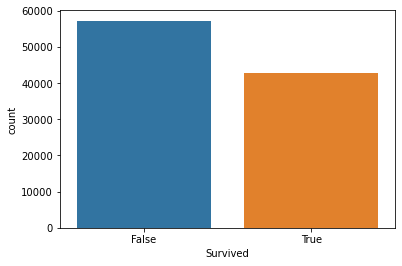

In [11]:
sns.countplot(x="Survived", data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

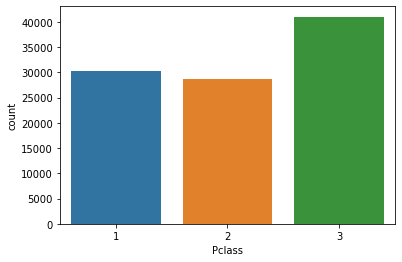

In [12]:
sns.countplot(x="Pclass", data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

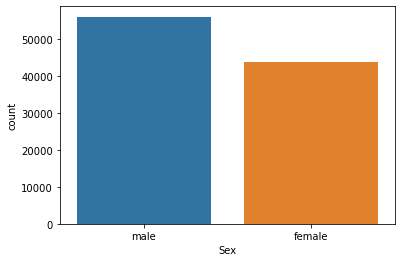

In [13]:
sns.countplot(x="Sex", data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

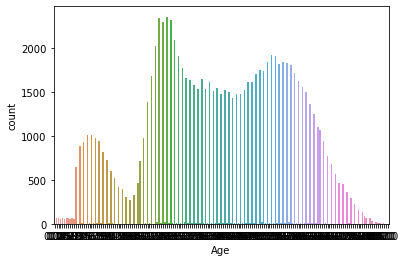

In [14]:
sns.countplot(x="Age", data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

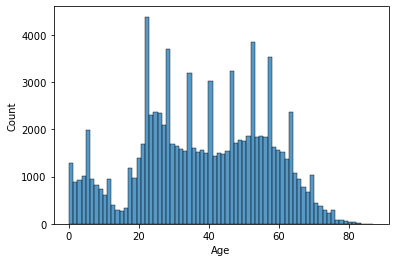

In [15]:
sns.histplot(x="Age", data=df)

Гистогамма выглядит странно, надо посчитать значения по годам

In [16]:
age_count = df.Age.value_counts()
age_count

25.0    2354
23.0    2345
26.0    2320
24.0    2298
27.0    2088
        ... 
14.5       1
74.5       1
78.5       1
13.5       1
87.0       1
Name: Age, Length: 173, dtype: int64

Подсчет по годам не превышает значения 2354. Похоже слишком мелкое разбиение искажает гистограмму

<AxesSubplot:xlabel='Age', ylabel='Count'>

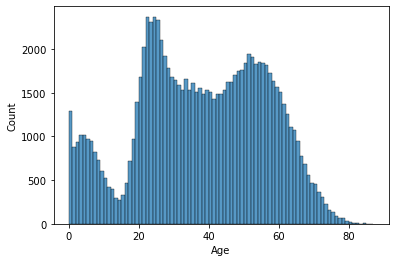

In [17]:
# Сделаем гистограмму с шириной ячейки один год
sns.histplot(x="Age", data=df, binwidth=1)

Так выглядит лучше. Остался всплекс на младенцах 0-1

In [18]:
age_count.sort_index().head(15)

0.08     39
0.17     67
0.25     68
0.33     53
0.42     62
0.50     58
0.58     62
0.67     62
0.75     57
0.83     63
0.92     51
1.00    649
1.50      2
2.00    879
2.50      7
Name: Age, dtype: int64

Значение на 1.0 вытягивает гистограмму. До года считают более дробно, тем кому больше года записывают год. В результате 0 и 1 попадают в одну корзину

<AxesSubplot:xlabel='SibSp', ylabel='count'>

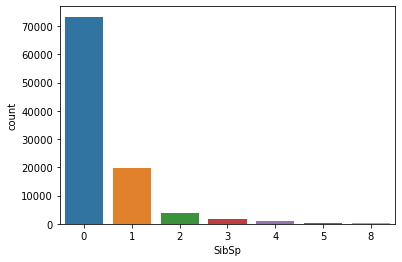

In [19]:
# гистограмма по критерию "братья, сестры, супруги"
sns.countplot(x='SibSp', data=df)

Большинство путешествовало в одиночку

<AxesSubplot:xlabel='Parch', ylabel='count'>

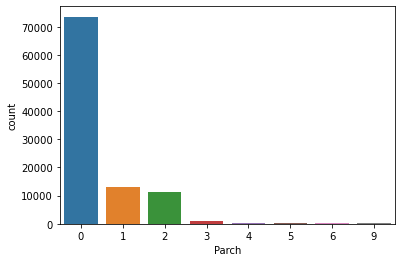

In [20]:
sns.countplot(x='Parch', data=df)

<AxesSubplot:xlabel='Fare', ylabel='count'>

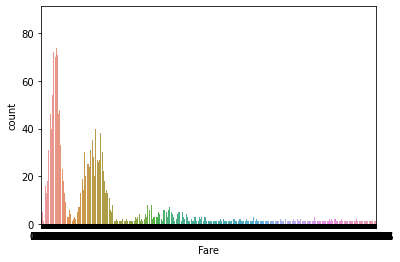

In [21]:
sns.countplot(x='Fare', data=df)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

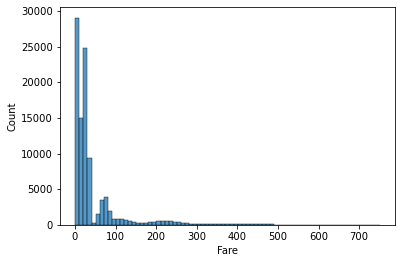

In [22]:
sns.histplot(x='Fare', data=df, binwidth=10)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

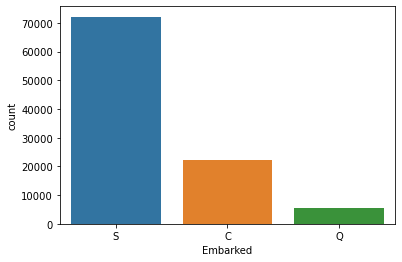

In [23]:
sns.countplot(x='Embarked', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

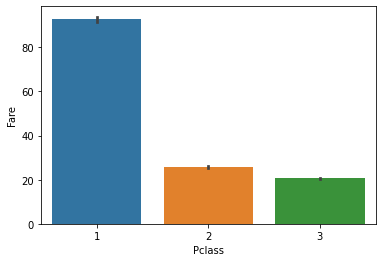

In [24]:
# Зависимость стоимости билета от класса
sns.barplot(x="Pclass", y="Fare", data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

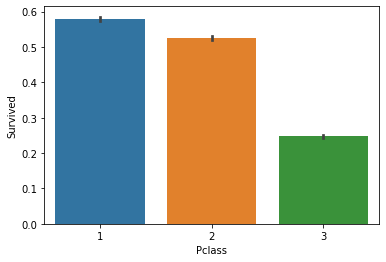

In [25]:
sns.barplot(x="Pclass", y="Survived", data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

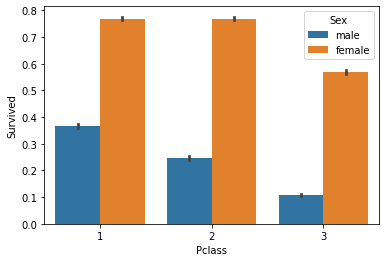

In [26]:
# Зависимость стоимости билета от класса
sns.barplot(x="Pclass", y="Survived", data=df, hue="Sex")

In [27]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,True,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,False,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,False,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,False,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,True,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,True,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,False,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,False,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,False,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


In [28]:
df.Fare = df.Fare.fillna(0)

In [29]:
df[df.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
39,39,True,2,"Cultice, May",female,61.0,0,0,10193,0.0,NaN,S
1404,1404,True,1,"Kerr, Maryann",female,55.0,0,0,15792,0.0,C5721,C
1909,1909,True,2,"Thomas, Jennifer",female,22.0,0,0,12598,0.0,NaN,Q
1999,1999,False,3,"Flatley, Trena",female,3.0,1,2,457224,0.0,NaN,S
3885,3885,True,1,"Harding, Lillian",female,48.0,1,2,14367,0.0,B7243,C
...,...,...,...,...,...,...,...,...,...,...,...,...
92227,92227,True,3,"Ramsay, Miriam",female,28.0,0,0,428649,0.0,NaN,S
93617,93617,True,2,"Hernandez, Tina",female,51.0,0,0,F.C. 31451,0.0,NaN,Q
93908,93908,False,2,"Cauthen, Judith",female,34.0,0,0,PC 490559,0.0,D16881,C
94656,94656,False,3,"Compton, William",male,26.0,0,0,466015,0.0,NaN,S


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

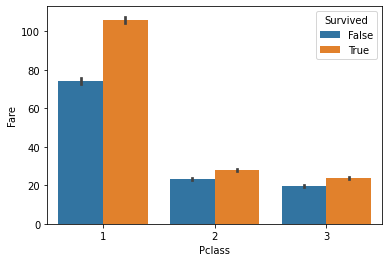

In [30]:
sns.barplot(x='Pclass', y='Fare', hue='Survived', data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

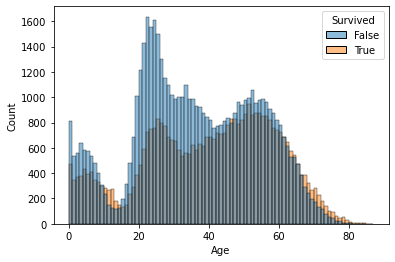

In [46]:
sns.histplot(x="Age", data=df, hue='Survived', binwidth=1)

<AxesSubplot:xlabel='Age', ylabel='Percent'>

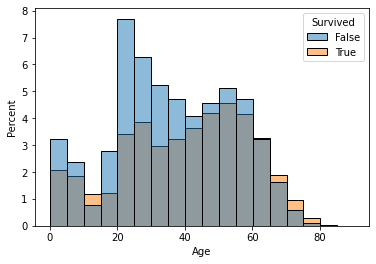

In [48]:
sns.histplot(x="Age", data=df, hue='Survived', binwidth=5, stat="percent")

In [53]:
# Как то бы с агрегировать здесь значения, чтоб получить отношение выживших по возрасту к общему числу
dff = (df["Age"][df["Survived"]==True]/df['Age'])
dff
#sns.histplot(x=(df["Age"][df["Survived"]==True]/df['Age']), binwidth=5, stat="percent")

0        NaN
1        NaN
2        NaN
3        NaN
4        1.0
        ... 
99995    1.0
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: Age, Length: 100000, dtype: float64

# Summary

<AxesSubplot:xlabel='Age', ylabel='Fare'>

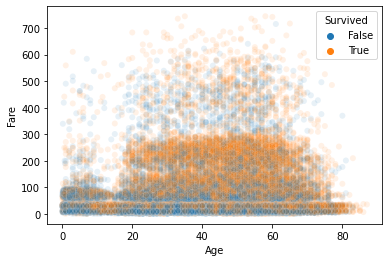

In [33]:
sns.scatterplot(data=df, x="Age", y="Fare", hue='Survived', alpha=0.1)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

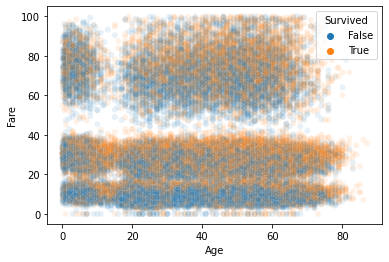

In [36]:
sns.scatterplot(x=df["Age"], y=df["Fare"][df['Fare']<100], hue=df['Survived'], alpha=0.1)

In [37]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.001956,-0.000893,-0.002654,0.001000,0.000411,-0.000828
Survived,0.001956,1.000000,-0.289723,0.103895,-0.007587,0.023352,0.187310
Pclass,-0.000893,-0.289723,1.000000,-0.259109,-0.051436,-0.041848,-0.416955
Age,-0.002654,0.103895,-0.259109,1.000000,-0.112459,-0.125535,0.109056
SibSp,0.001000,-0.007587,-0.051436,-0.112459,1.000000,0.213126,0.059403
Parch,0.000411,0.023352,-0.041848,-0.125535,0.213126,1.000000,0.061377
Fare,-0.000828,0.187310,-0.416955,0.109056,0.059403,0.061377,1.000000


<AxesSubplot:>

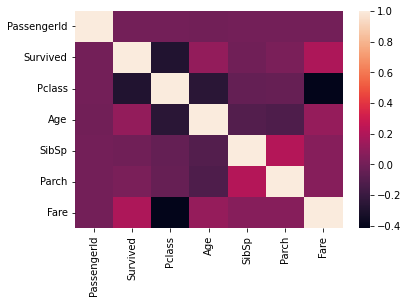

In [38]:
sns.heatmap(df.corr())